# Pretrained Word Embeddings - Glove

In this demonstration I will show how to load and utilize pretrained GloVe embeddings for a basic document clustering task, and compare the results to more basic, TF-IDF feature engineering. We will work with two different sets of corpora, both which contain brief customer feedback messages.

In order to utilize the pretrained embeddings, you will need to download and unzip then unzip the files. You can download them from [here](https://nlp.stanford.edu/projects/glove/).

Select the file called `Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip` for download.

As always, let's start with loading our dependencies:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Define corpora of customer feedback

In [ ]:
# Let's define two different simple corpora for customer feedback
corpus_1 = [
    "The product quality was great",
    "Shipping was very fast",
    "Customer service was not helpful",
    "Loved the product",
    "Shipping was slow",
    "Excellent customer service",
    "Product quality was poor",
    "Fast shipping",
    "Customer service could be better",
    "Very happy with the product"
]


corpus_2 = [
    "I am really satisfied with the product quality",
    "Really impressed by the fast shipping",
    "Excellent service from the customer support team",
    "Customer service was very helpful and friendly",
    "Really impressed by the high standards of the product quality",
    "The delivery was quicker than I expected",
    "The build quality of the product exceeded my expectations",
    "The product arrived in no time",
    "The support team was very patient and solved my problem"
]

# Corpus 1

## Clean Text

In [ ]:
# Define the text cleaning function
def clean_text(text):
    # Add in Case folding

    # Add in Tokenization

    # Stopwords removal
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

tokens = [] # apply to tokens in corpus_1

## Convert glove vectors to word2vec format using gensim

In [ ]:
%%time
# Input Training Word2Vec model parameters
model_w2v = Word2Vec(sentences=, vector_size=, window=, min_count=, workers=)

# If we have the GloVe model downloaded and we'll convert Glove vectors in text format into the word2vec text format:
glove_input_file = ''

word2vec_output_file = ''
glove2word2vec(glove_input_file, word2vec_output_file)

# load the converted model
model_glove = KeyedVectors.load_word2vec_format(, binary=) # input parameters

## Define functions for creating document embeddings

In [ ]:
# Add in comments for both functions

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    if isinstance(model, Word2Vec):
        vocabulary = set(model.wv.index_to_key)
        features = [average_word_vectors(tokenized_sentence, model.wv, vocabulary, num_features)
                        for tokenized_sentence in corpus]
    else:  # this part is for GloVe model, which is loaded as KeyedVectors
        vocabulary = set(model.index_to_key)
        features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                        for tokenized_sentence in corpus]

    return np.array(features)

In [ ]:
# Get document level embeddings
glove_feature_array =

# check shape

## Build TF-IDF matrix

In [ ]:
# Building TF-IDF matrix
vectorizer = TfidfVectorizer()
X_tfidf =

# check shape

## Perform KMeans Clustering, $k = 3$

In [ ]:
# Now, we will perform KMeans clustering
kmeans_glove = KMeans().fit()
kmeans_tfidf = KMeans().fit()

## Visualize document clusters using PCA plots for each Feature Engineering Method

In [ ]:
# Function to plot PCA
def plot_pca(data, labels, model_name):
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(data)

    colors = ["", "", ""] # choose your cluster colors

    plt.scatter(scatter_plot_points[:, 0], scatter_plot_points[:, 1], c=[colors[i] for i in labels])

    # add labels
    for i, label in enumerate(labels):
        plt.text(scatter_plot_points[i, 0], scatter_plot_points[i, 1], str(i))

    plt.title('PCA plot for '+ model_name)
    plt.show()

# Plotting PCA plots
plot_pca() # add input parameters
plot_pca() # add input parameters

In [ ]:
# Convert corpus to a DataFrame
df = pd.DataFrame()

# Add KMeans cluster labels
df['cluster_glove'] =
df['cluster_tfidf'] =

df

# Corpus 2

In [ ]:
# display corpus_2

## Clean Text

In [ ]:
# Apply the cleaning function to our corpus
tokens = [clean_text(doc) for doc in ]

## Convert glove vectors to word2vec format using gensim

In [ ]:
%%time
# Training Word2Vec model
model_w2v = Word2Vec(sentences=, vector_size=, window=, min_count=, workers=)

# Convert Glove vectors in text format into the word2vec text format:
glove_input_file = 'glove.6B.50d.txt'

word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the converted model
model_glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
# Get document level embeddings
glove_feature_array = averaged_word_vectorizer(corpus=, model=, num_features=)

# check shape

## Build TF-IDF Matrix

In [ ]:
# Building TF-IDF matrix
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform()

# check

(9, 40)

In [ ]:
# Now, we will perform KMeans clustering
kmeans_glove = KMeans(n_clusters=3, random_state=42).fit(glove_feature_array)
kmeans_tfidf = KMeans(n_clusters=3, random_state=42).fit(X_tfidf)

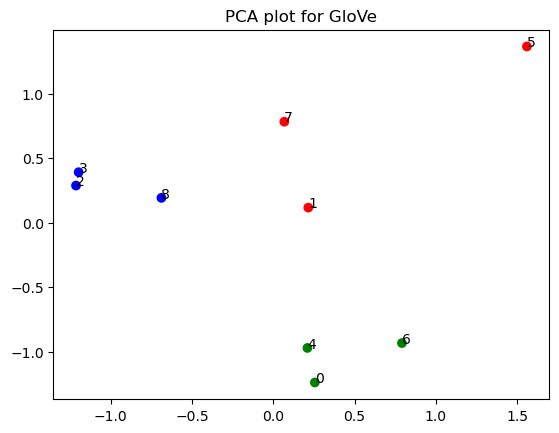

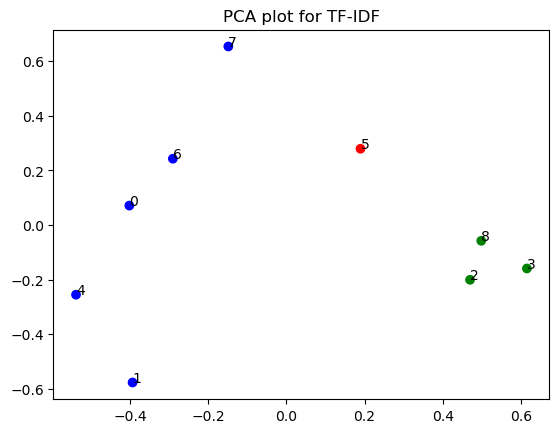

In [ ]:
# Function to plot PCA
def plot_pca(data, labels, model_name):
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(data)

    colors = ["red", "blue", "green"]

    plt.scatter(scatter_plot_points[:, 0], scatter_plot_points[:, 1], c=[colors[i] for i in labels])

    # add labels
    for i, label in enumerate(labels):
        plt.text(scatter_plot_points[i, 0], scatter_plot_points[i, 1], str(i))

    plt.title('PCA plot for '+ model_name)
    plt.show()

# Plotting PCA plots
plot_pca(glove_feature_array, kmeans_glove.labels_, 'GloVe')
plot_pca(X_tfidf.toarray(), kmeans_tfidf.labels_, 'TF-IDF')

In [ ]:
# Convert corpus to a DataFrame
df = pd.DataFrame(corpus_2, columns=['text'])

# Add KMeans cluster labels
df['cluster_glove'] = kmeans_glove.labels_
df['cluster_tfidf'] = kmeans_tfidf.labels_

df

,text,cluster_glove,cluster_tfidf
0,I am really satisfied with the product quality,2,1
1,Really impressed by the fast shipping,0,1
2,Excellent service from the customer support team,1,2
3,Customer service was very helpful and friendly,1,2
4,Really impressed by the high standards of the ...,2,1
5,The delivery was quicker than I expected,0,0
6,The build quality of the product exceeded my e...,2,1
7,The product arrived in no time,0,1
8,The support team was very patient and solved m...,1,2
